In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from LSTM_for_Stock.data_processor import DataLoader
from LSTM_for_Stock.model import Model
from LSTM_for_Stock import unit

Using TensorFlow backend.


In [2]:
def do(code, benchmark='399300', window=10, days=5, norm=True, split=0.15):
    dataloader = DataLoader(code, benchmark)
    model = Model()
    comp = {"optimizer": "adam",
            "loss": "mse",
            "metrics": [
                "mae",
                "acc"
            ]}
    layers = [{'units': 500, 'type': 'lstm'},
              {'units': days, 'type': 'dense'}]
    train = {'epochs': 200, 'verbose': 2, 'validation_split': split,'batch_size':128}

    model.build_model(layers, comp)
    X, Y = dataloader.get_train_data(window, days, norm)
    history = model.train(X, Y, train)
    unit.plot_history(history)

    X_val, Y_val = dataloader.get_valid_data(window, days, norm)
    print(model.evaluate(X_val,Y_val,{'batch_size':128}))
    pred = model.predict(X_val,{'batch_size':128})
    dd = DataLoader(code, benchmark, split=0,
                    start=dataloader._df_valid.index[0].strftime('%Y-%m-%d'), online=True)
    dd_X = dd.get_train_data(window, days, norm)[0][:, 0, 0]
    # 验证集误差计算
    unit.plot_result_by_slope(dd_X, pred, window, days, top=100).show()

Train on 2252 samples, validate on 398 samples
Epoch 1/200
 - 4s - loss: 0.0080 - mean_absolute_error: 0.0649 - acc: 0.2154 - val_loss: 0.0015 - val_mean_absolute_error: 0.0304 - val_acc: 0.2588
Epoch 2/200
 - 3s - loss: 4.8719e-04 - mean_absolute_error: 0.0169 - acc: 0.2131 - val_loss: 2.0840e-04 - val_mean_absolute_error: 0.0117 - val_acc: 0.2638
Epoch 3/200
 - 3s - loss: 1.7062e-04 - mean_absolute_error: 0.0099 - acc: 0.2274 - val_loss: 5.2640e-05 - val_mean_absolute_error: 0.0057 - val_acc: 0.2362
Epoch 4/200
 - 3s - loss: 1.1715e-04 - mean_absolute_error: 0.0079 - acc: 0.2180 - val_loss: 3.4865e-05 - val_mean_absolute_error: 0.0045 - val_acc: 0.1608
Epoch 5/200
 - 3s - loss: 1.0441e-04 - mean_absolute_error: 0.0074 - acc: 0.2313 - val_loss: 3.9816e-05 - val_mean_absolute_error: 0.0049 - val_acc: 0.2387
Epoch 6/200
 - 3s - loss: 1.0128e-04 - mean_absolute_error: 0.0072 - acc: 0.2322 - val_loss: 3.1916e-05 - val_mean_absolute_error: 0.0044 - val_acc: 0.2362
Epoch 7/200
 - 3s - loss:

Epoch 53/200
 - 3s - loss: 6.7997e-05 - mean_absolute_error: 0.0057 - acc: 0.2496 - val_loss: 1.9378e-05 - val_mean_absolute_error: 0.0034 - val_acc: 0.1859
Epoch 54/200
 - 3s - loss: 6.9183e-05 - mean_absolute_error: 0.0058 - acc: 0.2629 - val_loss: 1.6595e-05 - val_mean_absolute_error: 0.0031 - val_acc: 0.2663
Epoch 55/200
 - 3s - loss: 6.6186e-05 - mean_absolute_error: 0.0056 - acc: 0.2793 - val_loss: 2.2836e-05 - val_mean_absolute_error: 0.0038 - val_acc: 0.1583
Epoch 56/200
 - 3s - loss: 6.8959e-05 - mean_absolute_error: 0.0058 - acc: 0.2567 - val_loss: 3.3901e-05 - val_mean_absolute_error: 0.0047 - val_acc: 0.2638
Epoch 57/200
 - 3s - loss: 6.6936e-05 - mean_absolute_error: 0.0057 - acc: 0.2589 - val_loss: 1.7283e-05 - val_mean_absolute_error: 0.0032 - val_acc: 0.3191
Epoch 58/200
 - 3s - loss: 6.8338e-05 - mean_absolute_error: 0.0058 - acc: 0.2709 - val_loss: 1.4784e-05 - val_mean_absolute_error: 0.0029 - val_acc: 0.2839
Epoch 59/200
 - 3s - loss: 6.4185e-05 - mean_absolute_erro

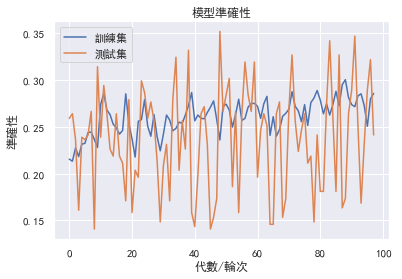

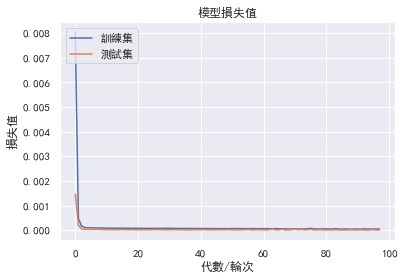

281/281 [==============================] - ETA:  - 0s 399us/step
[3.554907643483343e-05, 0.004241029565384963, 0.3024911029642163]


QUANTAXIS>> Selecting the Best Server IP of TDX


BAD RESPONSE 180.153.39.51
DEFAULT STOCK IP is BAD, RETESTING
BAD RESPONSE 61.152.107.168
BAD RESPONSE 113.05.73.88
BAD RESPONSE 121.14.110.194
BAD RESPONSE 119.147.164.60
BAD RESPONSE 119.147.171.206
BAD RESPONSE 121.14.2.7
BAD RESPONSE 60.28.29.69
BAD RESPONSE 180.153.18.17
BAD RESPONSE 59.173.18.69
BAD RESPONSE shtdx.gtjas.com
BAD RESPONSE 61.153.144.179
BAD RESPONSE 119.29.51.30
BAD RESPONSE 121.14.104.70
BAD RESPONSE 121.14.104.72
BAD RESPONSE 114.80.149.84
️Bad FUTUREIP REPSONSE 124.74.236.94
DEFAULT FUTURE IP is BAD, RETESTING
️Bad FUTUREIP REPSONSE 124.74.236.94
️Bad FUTUREIP REPSONSE 112.74.214.43
️Bad FUTUREIP REPSONSE 120.24.0.77
BAD RESPONSE 106.14.95.149
️Bad FUTUREIP REPSONSE 119.97.185.5
️Bad FUTUREIP REPSONSE 202.103.36.71
️Bad FUTUREIP REPSONSE 59.175.238.38
BAD RESPONSE 113.105.142.136
BAD RESPONSE 61.152.107.141
BAD RESPONSE 61.152.107.171
BAD RESPONSE 119.147.86.171
️Bad FUTUREIP REPSONSE 47.92.127.181


QUANTAXIS>> === The BEST SERVER ===
 stock_ip 180.153.18.170 future_ip 124.74.236.94


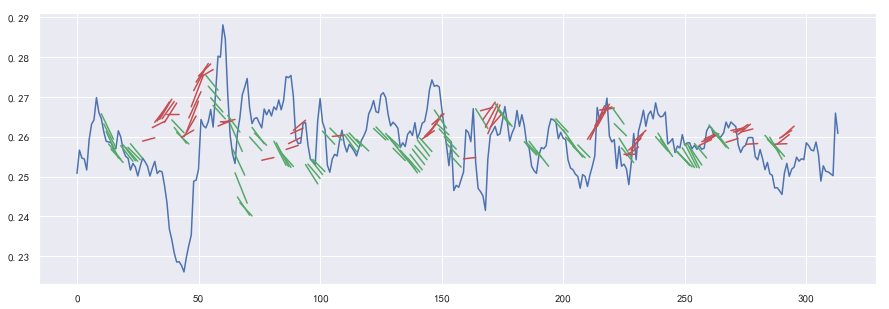

In [3]:
do('601398')

Train on 2559 samples, validate on 452 samples
Epoch 1/200
 - 5s - loss: 0.0067 - mean_absolute_error: 0.0589 - acc: 0.1958 - val_loss: 1.5494e-04 - val_mean_absolute_error: 0.0092 - val_acc: 0.2035
Epoch 2/200
 - 3s - loss: 4.8804e-04 - mean_absolute_error: 0.0172 - acc: 0.2235 - val_loss: 2.8420e-04 - val_mean_absolute_error: 0.0135 - val_acc: 0.2721
Epoch 3/200
 - 3s - loss: 2.6280e-04 - mean_absolute_error: 0.0122 - acc: 0.2372 - val_loss: 1.2043e-04 - val_mean_absolute_error: 0.0080 - val_acc: 0.2323
Epoch 4/200
 - 3s - loss: 2.1457e-04 - mean_absolute_error: 0.0109 - acc: 0.2325 - val_loss: 1.1775e-04 - val_mean_absolute_error: 0.0079 - val_acc: 0.2080
Epoch 5/200
 - 3s - loss: 2.0528e-04 - mean_absolute_error: 0.0106 - acc: 0.2380 - val_loss: 1.0894e-04 - val_mean_absolute_error: 0.0074 - val_acc: 0.2124
Epoch 6/200
 - 3s - loss: 1.9741e-04 - mean_absolute_error: 0.0104 - acc: 0.2274 - val_loss: 1.1007e-04 - val_mean_absolute_error: 0.0077 - val_acc: 0.2146
Epoch 7/200
 - 3s - l

Epoch 53/200
 - 3s - loss: 9.1232e-05 - mean_absolute_error: 0.0071 - acc: 0.2599 - val_loss: 1.8692e-04 - val_mean_absolute_error: 0.0123 - val_acc: 0.2765
Epoch 54/200
 - 3s - loss: 1.1852e-04 - mean_absolute_error: 0.0083 - acc: 0.2603 - val_loss: 5.0073e-05 - val_mean_absolute_error: 0.0050 - val_acc: 0.2500
Epoch 55/200
 - 3s - loss: 8.0469e-05 - mean_absolute_error: 0.0066 - acc: 0.2880 - val_loss: 4.3500e-05 - val_mean_absolute_error: 0.0047 - val_acc: 0.3274
Epoch 56/200
 - 3s - loss: 8.7860e-05 - mean_absolute_error: 0.0070 - acc: 0.2638 - val_loss: 4.3505e-05 - val_mean_absolute_error: 0.0048 - val_acc: 0.2876
Epoch 57/200
 - 3s - loss: 8.5458e-05 - mean_absolute_error: 0.0069 - acc: 0.2689 - val_loss: 4.1970e-05 - val_mean_absolute_error: 0.0048 - val_acc: 0.2876
Epoch 58/200
 - 3s - loss: 7.6871e-05 - mean_absolute_error: 0.0065 - acc: 0.2845 - val_loss: 9.7915e-05 - val_mean_absolute_error: 0.0079 - val_acc: 0.2389
Epoch 59/200
 - 3s - loss: 9.2327e-05 - mean_absolute_erro

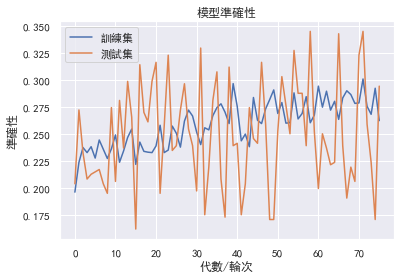

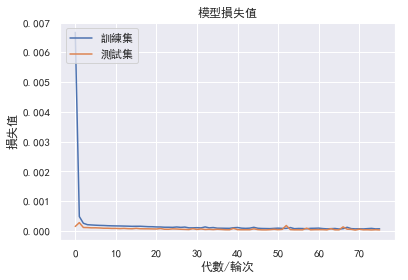

322/322 [==============================] - ETA:  - 0s 379us/step
[6.075117987239305e-05, 0.006018998647999504, 0.27329192398497776]


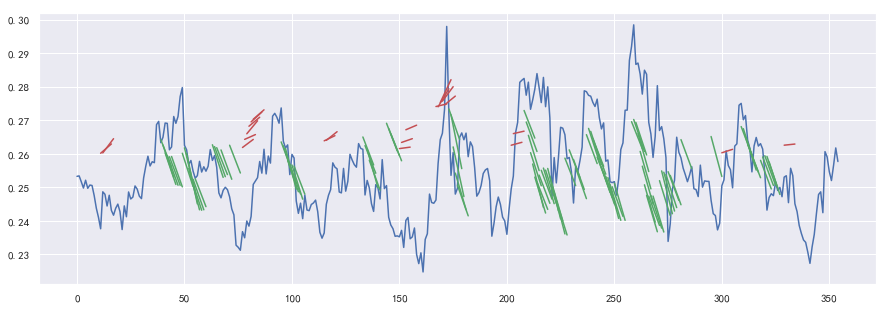

In [4]:
do('600436')

Train on 2443 samples, validate on 432 samples
Epoch 1/200
 - 4s - loss: 0.0086 - mean_absolute_error: 0.0615 - acc: 0.2165 - val_loss: 9.3397e-04 - val_mean_absolute_error: 0.0218 - val_acc: 0.2755
Epoch 2/200
 - 3s - loss: 4.1598e-04 - mean_absolute_error: 0.0143 - acc: 0.2165 - val_loss: 1.7357e-04 - val_mean_absolute_error: 0.0098 - val_acc: 0.2755
Epoch 3/200
 - 3s - loss: 1.8091e-04 - mean_absolute_error: 0.0099 - acc: 0.2186 - val_loss: 1.3413e-04 - val_mean_absolute_error: 0.0085 - val_acc: 0.1644
Epoch 4/200
 - 3s - loss: 1.5117e-04 - mean_absolute_error: 0.0090 - acc: 0.2112 - val_loss: 1.3088e-04 - val_mean_absolute_error: 0.0083 - val_acc: 0.1412
Epoch 5/200
 - 3s - loss: 1.4418e-04 - mean_absolute_error: 0.0088 - acc: 0.1993 - val_loss: 1.2318e-04 - val_mean_absolute_error: 0.0080 - val_acc: 0.2130
Epoch 6/200
 - 3s - loss: 1.3690e-04 - mean_absolute_error: 0.0085 - acc: 0.2034 - val_loss: 1.2044e-04 - val_mean_absolute_error: 0.0079 - val_acc: 0.2616
Epoch 7/200
 - 3s - l

Epoch 53/200
 - 3s - loss: 6.9312e-05 - mean_absolute_error: 0.0060 - acc: 0.2567 - val_loss: 8.2785e-05 - val_mean_absolute_error: 0.0061 - val_acc: 0.1852
Epoch 54/200
 - 3s - loss: 7.5865e-05 - mean_absolute_error: 0.0065 - acc: 0.2616 - val_loss: 1.0952e-04 - val_mean_absolute_error: 0.0075 - val_acc: 0.2361
Epoch 55/200
 - 3s - loss: 8.4496e-05 - mean_absolute_error: 0.0070 - acc: 0.2509 - val_loss: 6.8903e-05 - val_mean_absolute_error: 0.0056 - val_acc: 0.2546
Epoch 56/200
 - 3s - loss: 9.1224e-05 - mean_absolute_error: 0.0073 - acc: 0.2763 - val_loss: 9.1159e-05 - val_mean_absolute_error: 0.0066 - val_acc: 0.2708
Epoch 57/200
 - 3s - loss: 7.9352e-05 - mean_absolute_error: 0.0066 - acc: 0.2571 - val_loss: 9.4593e-05 - val_mean_absolute_error: 0.0067 - val_acc: 0.1736
Epoch 58/200
 - 3s - loss: 6.7996e-05 - mean_absolute_error: 0.0060 - acc: 0.2354 - val_loss: 7.3742e-05 - val_mean_absolute_error: 0.0060 - val_acc: 0.2454
Epoch 59/200
 - 3s - loss: 7.8528e-05 - mean_absolute_erro

Epoch 106/200
 - 3s - loss: 4.7157e-05 - mean_absolute_error: 0.0050 - acc: 0.2792 - val_loss: 6.9187e-05 - val_mean_absolute_error: 0.0062 - val_acc: 0.1644
Epoch 107/200
 - 3s - loss: 5.2019e-05 - mean_absolute_error: 0.0054 - acc: 0.2796 - val_loss: 4.9676e-05 - val_mean_absolute_error: 0.0050 - val_acc: 0.1806
Epoch 108/200
 - 3s - loss: 5.1328e-05 - mean_absolute_error: 0.0053 - acc: 0.2558 - val_loss: 7.2470e-05 - val_mean_absolute_error: 0.0068 - val_acc: 0.2824
Epoch 109/200
 - 3s - loss: 6.4709e-05 - mean_absolute_error: 0.0062 - acc: 0.2591 - val_loss: 9.4617e-05 - val_mean_absolute_error: 0.0082 - val_acc: 0.2731
Epoch 110/200
 - 3s - loss: 7.3286e-05 - mean_absolute_error: 0.0066 - acc: 0.2661 - val_loss: 5.2625e-05 - val_mean_absolute_error: 0.0049 - val_acc: 0.2755
Epoch 111/200
 - 3s - loss: 5.9812e-05 - mean_absolute_error: 0.0057 - acc: 0.2726 - val_loss: 6.1426e-05 - val_mean_absolute_error: 0.0055 - val_acc: 0.2569
Epoch 112/200
 - 3s - loss: 6.6934e-05 - mean_absolu

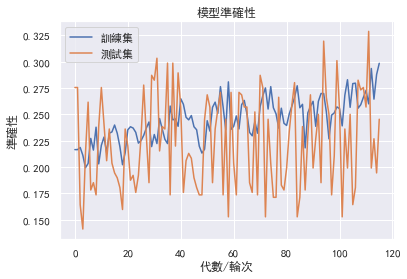

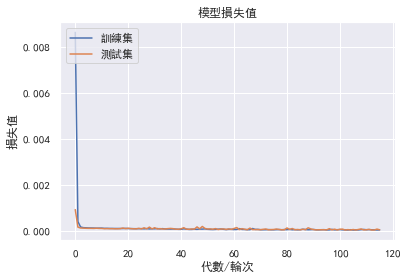

306/306 [==============================] - ETA:  - 0s 392us/step
[3.93902534353425e-05, 0.004749183275195119, 0.2973856228628969]


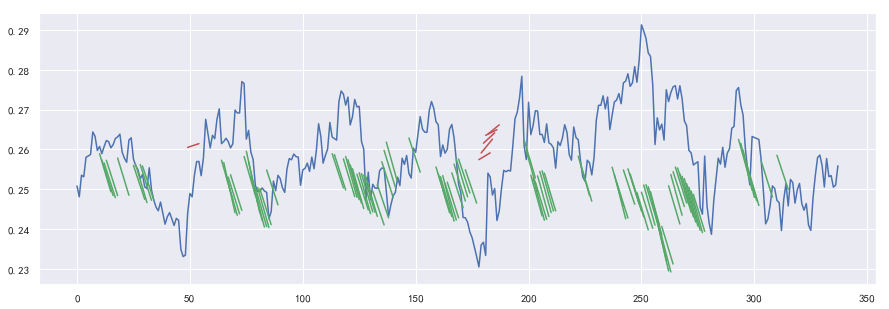

In [5]:
do('000538')

Train on 2446 samples, validate on 432 samples
Epoch 1/200
 - 4s - loss: 0.0074 - mean_absolute_error: 0.0621 - acc: 0.1725 - val_loss: 3.5123e-04 - val_mean_absolute_error: 0.0147 - val_acc: 0.2593
Epoch 2/200
 - 3s - loss: 6.7301e-04 - mean_absolute_error: 0.0201 - acc: 0.1807 - val_loss: 2.8453e-04 - val_mean_absolute_error: 0.0132 - val_acc: 0.1644
Epoch 3/200
 - 3s - loss: 3.4808e-04 - mean_absolute_error: 0.0141 - acc: 0.1979 - val_loss: 1.8804e-04 - val_mean_absolute_error: 0.0101 - val_acc: 0.2130
Epoch 4/200
 - 3s - loss: 2.8366e-04 - mean_absolute_error: 0.0126 - acc: 0.2273 - val_loss: 1.8316e-04 - val_mean_absolute_error: 0.0098 - val_acc: 0.2500
Epoch 5/200
 - 3s - loss: 2.6313e-04 - mean_absolute_error: 0.0121 - acc: 0.2175 - val_loss: 1.8316e-04 - val_mean_absolute_error: 0.0095 - val_acc: 0.2662
Epoch 6/200
 - 3s - loss: 2.4966e-04 - mean_absolute_error: 0.0117 - acc: 0.2559 - val_loss: 1.6530e-04 - val_mean_absolute_error: 0.0090 - val_acc: 0.2616
Epoch 7/200
 - 3s - l

Epoch 53/200
 - 3s - loss: 1.3026e-04 - mean_absolute_error: 0.0087 - acc: 0.2854 - val_loss: 1.3661e-04 - val_mean_absolute_error: 0.0085 - val_acc: 0.2593
Epoch 54/200
 - 3s - loss: 1.3872e-04 - mean_absolute_error: 0.0090 - acc: 0.3009 - val_loss: 1.4645e-04 - val_mean_absolute_error: 0.0104 - val_acc: 0.2431
Epoch 55/200
 - 3s - loss: 1.2042e-04 - mean_absolute_error: 0.0083 - acc: 0.2948 - val_loss: 8.5157e-05 - val_mean_absolute_error: 0.0063 - val_acc: 0.2708
Epoch 56/200
 - 3s - loss: 1.0779e-04 - mean_absolute_error: 0.0078 - acc: 0.2711 - val_loss: 1.2429e-04 - val_mean_absolute_error: 0.0083 - val_acc: 0.2824
Epoch 00056: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 500)               1022000   
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 2505      
Total params: 

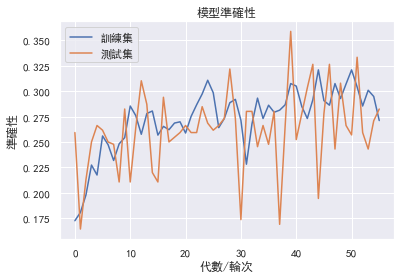

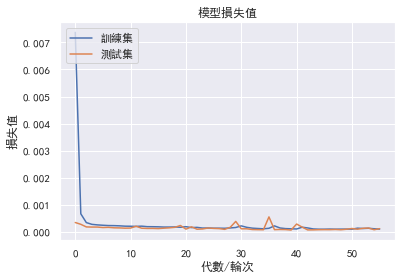

307/307 [==============================] - ETA:  - ETA:  - 0s 414us/step
[0.00011540456982716275, 0.008372549108663386, 0.26058631929104803]


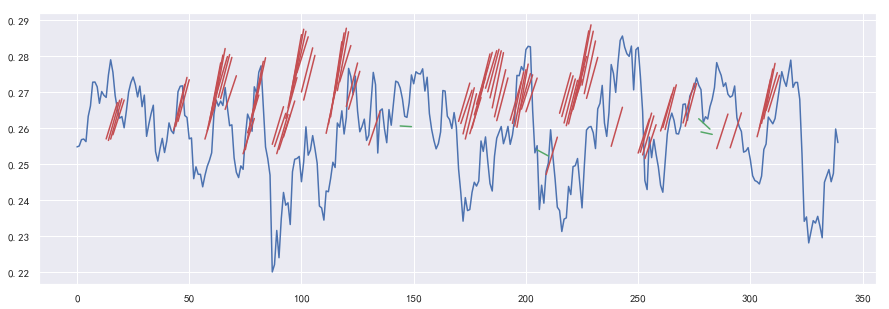

In [6]:
do('600967')

Train on 2531 samples, validate on 447 samples
Epoch 1/200
 - 5s - loss: 0.0080 - mean_absolute_error: 0.0651 - acc: 0.1932 - val_loss: 3.6827e-04 - val_mean_absolute_error: 0.0151 - val_acc: 0.2506
Epoch 2/200
 - 3s - loss: 5.3195e-04 - mean_absolute_error: 0.0177 - acc: 0.1865 - val_loss: 1.1471e-04 - val_mean_absolute_error: 0.0086 - val_acc: 0.1611
Epoch 3/200
 - 3s - loss: 2.8148e-04 - mean_absolute_error: 0.0127 - acc: 0.1845 - val_loss: 9.2018e-05 - val_mean_absolute_error: 0.0078 - val_acc: 0.1611
Epoch 4/200
 - 3s - loss: 2.3897e-04 - mean_absolute_error: 0.0115 - acc: 0.1928 - val_loss: 6.9687e-05 - val_mean_absolute_error: 0.0066 - val_acc: 0.1834
Epoch 5/200
 - 3s - loss: 2.2456e-04 - mean_absolute_error: 0.0111 - acc: 0.2371 - val_loss: 6.7733e-05 - val_mean_absolute_error: 0.0064 - val_acc: 0.2371
Epoch 6/200
 - 3s - loss: 2.1594e-04 - mean_absolute_error: 0.0108 - acc: 0.2683 - val_loss: 6.7881e-05 - val_mean_absolute_error: 0.0064 - val_acc: 0.2282
Epoch 7/200
 - 3s - l

Epoch 53/200
 - 3s - loss: 9.6119e-05 - mean_absolute_error: 0.0072 - acc: 0.2797 - val_loss: 3.0165e-05 - val_mean_absolute_error: 0.0040 - val_acc: 0.2998
Epoch 54/200
 - 3s - loss: 8.9745e-05 - mean_absolute_error: 0.0070 - acc: 0.3240 - val_loss: 4.4752e-05 - val_mean_absolute_error: 0.0050 - val_acc: 0.2170
Epoch 55/200
 - 3s - loss: 1.2563e-04 - mean_absolute_error: 0.0086 - acc: 0.2789 - val_loss: 3.8565e-05 - val_mean_absolute_error: 0.0046 - val_acc: 0.1946
Epoch 56/200
 - 3s - loss: 1.1858e-04 - mean_absolute_error: 0.0083 - acc: 0.2853 - val_loss: 3.5358e-05 - val_mean_absolute_error: 0.0047 - val_acc: 0.2438
Epoch 57/200
 - 3s - loss: 8.7901e-05 - mean_absolute_error: 0.0069 - acc: 0.3157 - val_loss: 2.7331e-05 - val_mean_absolute_error: 0.0039 - val_acc: 0.2483
Epoch 58/200
 - 3s - loss: 8.7169e-05 - mean_absolute_error: 0.0069 - acc: 0.3161 - val_loss: 6.0095e-05 - val_mean_absolute_error: 0.0067 - val_acc: 0.2953
Epoch 59/200
 - 3s - loss: 9.0345e-05 - mean_absolute_erro

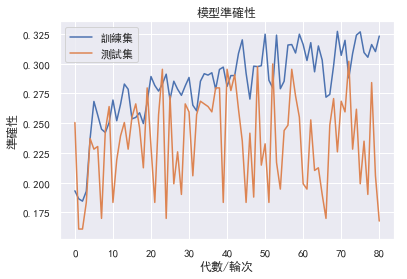

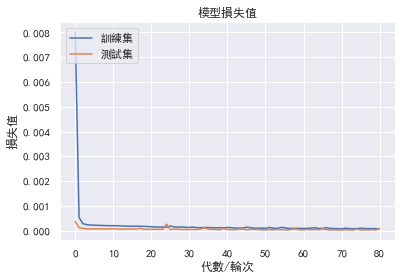

318/318 [==============================] - ETA:  - 0s 396us/step
[0.00014334617802395878, 0.009466684616680415, 0.1886792443458389]


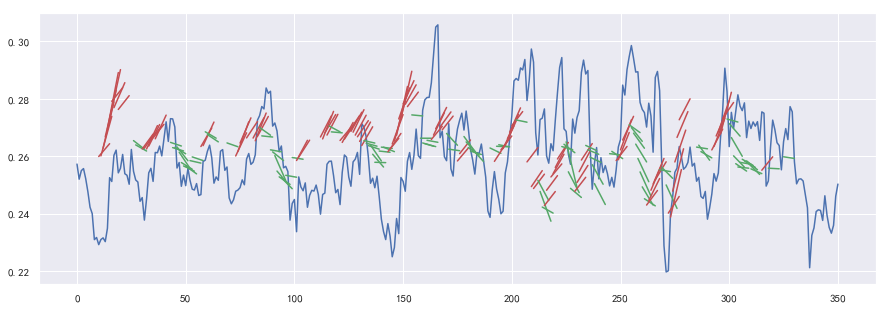

In [7]:
do('600867')

Train on 2539 samples, validate on 449 samples
Epoch 1/200
 - 4s - loss: 0.0069 - mean_absolute_error: 0.0591 - acc: 0.1894 - val_loss: 1.5405e-04 - val_mean_absolute_error: 0.0098 - val_acc: 0.1581
Epoch 2/200
 - 3s - loss: 5.2240e-04 - mean_absolute_error: 0.0176 - acc: 0.2072 - val_loss: 1.8742e-04 - val_mean_absolute_error: 0.0106 - val_acc: 0.2205
Epoch 3/200
 - 3s - loss: 3.2173e-04 - mean_absolute_error: 0.0137 - acc: 0.1922 - val_loss: 9.9398e-05 - val_mean_absolute_error: 0.0075 - val_acc: 0.2494
Epoch 4/200
 - 3s - loss: 2.7009e-04 - mean_absolute_error: 0.0124 - acc: 0.2217 - val_loss: 9.8364e-05 - val_mean_absolute_error: 0.0077 - val_acc: 0.2851
Epoch 5/200
 - 3s - loss: 2.5690e-04 - mean_absolute_error: 0.0121 - acc: 0.2127 - val_loss: 9.4202e-05 - val_mean_absolute_error: 0.0075 - val_acc: 0.2094
Epoch 6/200
 - 3s - loss: 2.4726e-04 - mean_absolute_error: 0.0118 - acc: 0.2217 - val_loss: 7.4834e-05 - val_mean_absolute_error: 0.0066 - val_acc: 0.2450
Epoch 7/200
 - 3s - l

Epoch 53/200
 - 3s - loss: 9.7092e-05 - mean_absolute_error: 0.0073 - acc: 0.2808 - val_loss: 4.9909e-05 - val_mean_absolute_error: 0.0059 - val_acc: 0.1492
Epoch 54/200
 - 3s - loss: 9.8958e-05 - mean_absolute_error: 0.0075 - acc: 0.2808 - val_loss: 2.7619e-05 - val_mean_absolute_error: 0.0039 - val_acc: 0.2450
Epoch 55/200
 - 3s - loss: 1.0297e-04 - mean_absolute_error: 0.0075 - acc: 0.3005 - val_loss: 2.1300e-04 - val_mean_absolute_error: 0.0133 - val_acc: 0.2984
Epoch 56/200
 - 3s - loss: 1.0918e-04 - mean_absolute_error: 0.0078 - acc: 0.2836 - val_loss: 3.0555e-05 - val_mean_absolute_error: 0.0043 - val_acc: 0.2584
Epoch 57/200
 - 3s - loss: 8.7697e-05 - mean_absolute_error: 0.0069 - acc: 0.2911 - val_loss: 4.8988e-05 - val_mean_absolute_error: 0.0053 - val_acc: 0.2450
Epoch 58/200
 - 3s - loss: 9.4711e-05 - mean_absolute_error: 0.0073 - acc: 0.2974 - val_loss: 3.8137e-05 - val_mean_absolute_error: 0.0048 - val_acc: 0.2049
Epoch 59/200
 - 3s - loss: 1.0163e-04 - mean_absolute_erro

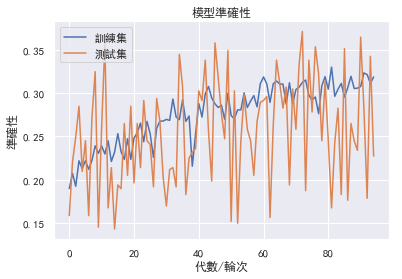

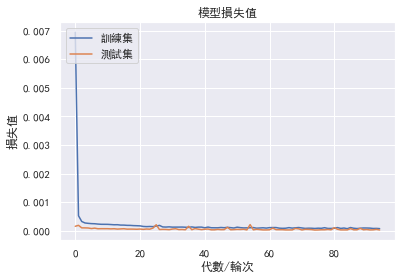

319/319 [==============================] - ETA:  - 0s 354us/step
[2.5907286187724375e-05, 0.004031673233611597, 0.2570532944322006]


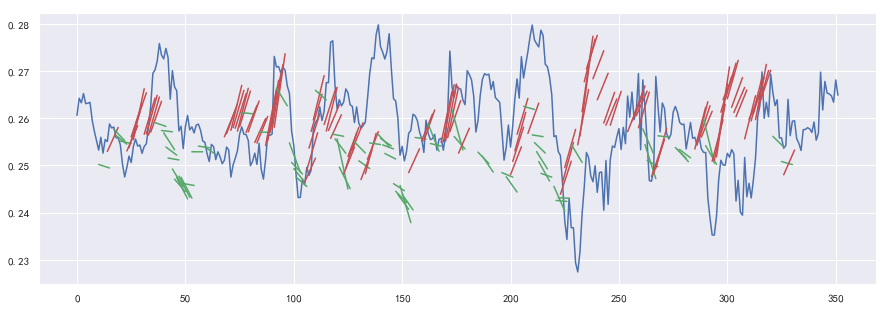

In [8]:
do('600612')

Train on 2210 samples, validate on 391 samples
Epoch 1/200
 - 4s - loss: 0.0085 - mean_absolute_error: 0.0675 - acc: 0.2321 - val_loss: 0.0019 - val_mean_absolute_error: 0.0370 - val_acc: 0.2839
Epoch 2/200
 - 3s - loss: 8.9065e-04 - mean_absolute_error: 0.0235 - acc: 0.2258 - val_loss: 4.0988e-04 - val_mean_absolute_error: 0.0159 - val_acc: 0.2864
Epoch 3/200
 - 3s - loss: 4.8952e-04 - mean_absolute_error: 0.0166 - acc: 0.2389 - val_loss: 1.8898e-04 - val_mean_absolute_error: 0.0100 - val_acc: 0.3018
Epoch 4/200
 - 3s - loss: 4.4265e-04 - mean_absolute_error: 0.0155 - acc: 0.2670 - val_loss: 1.7669e-04 - val_mean_absolute_error: 0.0097 - val_acc: 0.1841
Epoch 5/200
 - 3s - loss: 4.2370e-04 - mean_absolute_error: 0.0150 - acc: 0.2538 - val_loss: 1.7937e-04 - val_mean_absolute_error: 0.0098 - val_acc: 0.2174
Epoch 6/200
 - 3s - loss: 4.1657e-04 - mean_absolute_error: 0.0148 - acc: 0.2683 - val_loss: 1.4984e-04 - val_mean_absolute_error: 0.0090 - val_acc: 0.2123
Epoch 7/200
 - 3s - loss:

Epoch 53/200
 - 3s - loss: 1.9203e-04 - mean_absolute_error: 0.0107 - acc: 0.3122 - val_loss: 4.7821e-05 - val_mean_absolute_error: 0.0050 - val_acc: 0.2737
Epoch 54/200
 - 3s - loss: 1.3551e-04 - mean_absolute_error: 0.0086 - acc: 0.3244 - val_loss: 5.1711e-05 - val_mean_absolute_error: 0.0055 - val_acc: 0.3120
Epoch 55/200
 - 3s - loss: 1.2842e-04 - mean_absolute_error: 0.0083 - acc: 0.3371 - val_loss: 8.6606e-05 - val_mean_absolute_error: 0.0074 - val_acc: 0.2967
Epoch 56/200
 - 3s - loss: 1.2937e-04 - mean_absolute_error: 0.0085 - acc: 0.3403 - val_loss: 5.7858e-05 - val_mean_absolute_error: 0.0057 - val_acc: 0.2583
Epoch 57/200
 - 3s - loss: 1.1665e-04 - mean_absolute_error: 0.0079 - acc: 0.3267 - val_loss: 1.1565e-04 - val_mean_absolute_error: 0.0088 - val_acc: 0.2148
Epoch 58/200
 - 3s - loss: 1.3701e-04 - mean_absolute_error: 0.0088 - acc: 0.3267 - val_loss: 5.5720e-05 - val_mean_absolute_error: 0.0057 - val_acc: 0.2097
Epoch 59/200
 - 3s - loss: 1.1825e-04 - mean_absolute_erro

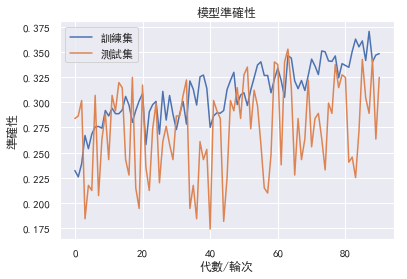

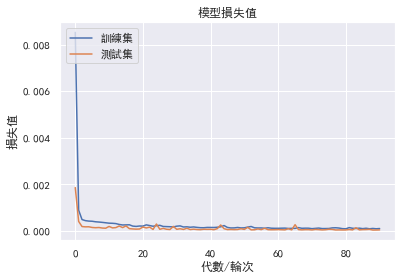

276/276 [==============================] - ETA:  - 0s 431us/step
[4.707131681599371e-05, 0.005319814413677955, 0.29347826108552405]


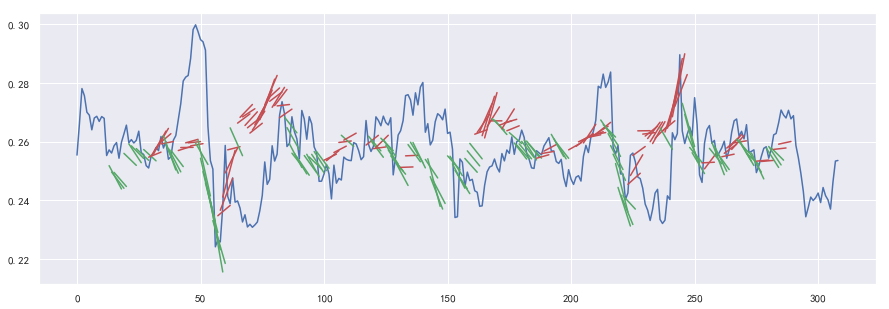

In [9]:
do('000628')

Train on 2118 samples, validate on 374 samples
Epoch 1/200
 - 4s - loss: 0.0096 - mean_absolute_error: 0.0707 - acc: 0.2054 - val_loss: 0.0023 - val_mean_absolute_error: 0.0379 - val_acc: 0.1364
Epoch 2/200
 - 2s - loss: 7.7229e-04 - mean_absolute_error: 0.0211 - acc: 0.1941 - val_loss: 7.2220e-04 - val_mean_absolute_error: 0.0210 - val_acc: 0.1364
Epoch 3/200
 - 2s - loss: 3.5132e-04 - mean_absolute_error: 0.0144 - acc: 0.2106 - val_loss: 5.3637e-04 - val_mean_absolute_error: 0.0177 - val_acc: 0.1497
Epoch 4/200
 - 2s - loss: 2.7596e-04 - mean_absolute_error: 0.0124 - acc: 0.2044 - val_loss: 5.0081e-04 - val_mean_absolute_error: 0.0170 - val_acc: 0.1604
Epoch 5/200
 - 2s - loss: 2.5236e-04 - mean_absolute_error: 0.0118 - acc: 0.2262 - val_loss: 4.9021e-04 - val_mean_absolute_error: 0.0167 - val_acc: 0.2273
Epoch 6/200
 - 2s - loss: 2.4287e-04 - mean_absolute_error: 0.0115 - acc: 0.2158 - val_loss: 4.8423e-04 - val_mean_absolute_error: 0.0165 - val_acc: 0.2059
Epoch 7/200
 - 2s - loss:

Epoch 53/200
 - 2s - loss: 1.2543e-04 - mean_absolute_error: 0.0081 - acc: 0.2946 - val_loss: 2.2300e-04 - val_mean_absolute_error: 0.0116 - val_acc: 0.2005
Epoch 54/200
 - 2s - loss: 1.1608e-04 - mean_absolute_error: 0.0077 - acc: 0.2913 - val_loss: 2.0237e-04 - val_mean_absolute_error: 0.0104 - val_acc: 0.2995
Epoch 55/200
 - 2s - loss: 1.2797e-04 - mean_absolute_error: 0.0083 - acc: 0.3031 - val_loss: 1.8792e-04 - val_mean_absolute_error: 0.0103 - val_acc: 0.3369
Epoch 56/200
 - 2s - loss: 1.1370e-04 - mean_absolute_error: 0.0076 - acc: 0.2960 - val_loss: 1.8226e-04 - val_mean_absolute_error: 0.0102 - val_acc: 0.3663
Epoch 57/200
 - 2s - loss: 1.6190e-04 - mean_absolute_error: 0.0096 - acc: 0.3003 - val_loss: 2.2266e-04 - val_mean_absolute_error: 0.0110 - val_acc: 0.2995
Epoch 58/200
 - 2s - loss: 1.4542e-04 - mean_absolute_error: 0.0089 - acc: 0.2686 - val_loss: 2.2540e-04 - val_mean_absolute_error: 0.0115 - val_acc: 0.2380
Epoch 59/200
 - 2s - loss: 1.2698e-04 - mean_absolute_erro

Epoch 106/200
 - 2s - loss: 9.0964e-05 - mean_absolute_error: 0.0071 - acc: 0.3178 - val_loss: 1.3466e-04 - val_mean_absolute_error: 0.0091 - val_acc: 0.3930
Epoch 107/200
 - 2s - loss: 8.6060e-05 - mean_absolute_error: 0.0068 - acc: 0.3093 - val_loss: 1.1295e-04 - val_mean_absolute_error: 0.0081 - val_acc: 0.3529
Epoch 108/200
 - 2s - loss: 7.3976e-05 - mean_absolute_error: 0.0062 - acc: 0.3489 - val_loss: 1.2048e-04 - val_mean_absolute_error: 0.0082 - val_acc: 0.2540
Epoch 109/200
 - 2s - loss: 8.8186e-05 - mean_absolute_error: 0.0070 - acc: 0.3494 - val_loss: 1.4783e-04 - val_mean_absolute_error: 0.0094 - val_acc: 0.3556
Epoch 110/200
 - 2s - loss: 8.7880e-05 - mean_absolute_error: 0.0070 - acc: 0.3055 - val_loss: 1.2061e-04 - val_mean_absolute_error: 0.0083 - val_acc: 0.2861
Epoch 111/200
 - 2s - loss: 8.2515e-05 - mean_absolute_error: 0.0068 - acc: 0.3248 - val_loss: 1.1486e-04 - val_mean_absolute_error: 0.0080 - val_acc: 0.3503
Epoch 112/200
 - 2s - loss: 7.6330e-05 - mean_absolu

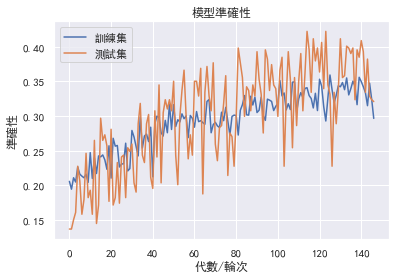

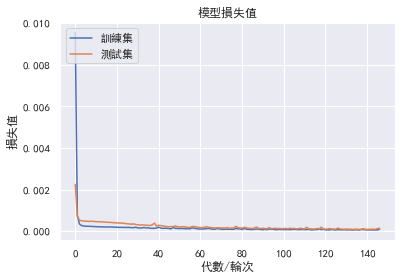

264/264 [==============================] - ETA:  - 0s 402us/step
[0.00010014066576717816, 0.008087485633564718, 0.3106060606060606]


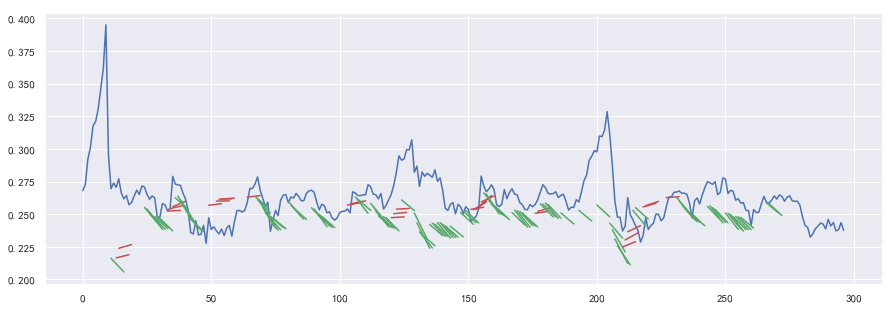

In [10]:
do('000155')

Train on 1910 samples, validate on 338 samples
Epoch 1/200
 - 4s - loss: 0.0106 - mean_absolute_error: 0.0766 - acc: 0.2571 - val_loss: 0.0012 - val_mean_absolute_error: 0.0284 - val_acc: 0.1538
Epoch 2/200
 - 2s - loss: 0.0012 - mean_absolute_error: 0.0276 - acc: 0.2393 - val_loss: 4.7998e-04 - val_mean_absolute_error: 0.0162 - val_acc: 0.2426
Epoch 3/200
 - 2s - loss: 6.1305e-04 - mean_absolute_error: 0.0187 - acc: 0.2319 - val_loss: 4.9802e-04 - val_mean_absolute_error: 0.0171 - val_acc: 0.2574
Epoch 4/200
 - 2s - loss: 4.8027e-04 - mean_absolute_error: 0.0162 - acc: 0.2157 - val_loss: 4.8812e-04 - val_mean_absolute_error: 0.0169 - val_acc: 0.2751
Epoch 5/200
 - 2s - loss: 4.5427e-04 - mean_absolute_error: 0.0156 - acc: 0.2115 - val_loss: 4.5649e-04 - val_mean_absolute_error: 0.0160 - val_acc: 0.2574
Epoch 6/200
 - 2s - loss: 4.3861e-04 - mean_absolute_error: 0.0153 - acc: 0.2230 - val_loss: 4.4589e-04 - val_mean_absolute_error: 0.0157 - val_acc: 0.2929
Epoch 7/200
 - 2s - loss: 4.2

Epoch 53/200
 - 2s - loss: 1.5734e-04 - mean_absolute_error: 0.0094 - acc: 0.3204 - val_loss: 1.9726e-04 - val_mean_absolute_error: 0.0113 - val_acc: 0.3314
Epoch 54/200
 - 2s - loss: 1.4458e-04 - mean_absolute_error: 0.0089 - acc: 0.2963 - val_loss: 1.5089e-04 - val_mean_absolute_error: 0.0089 - val_acc: 0.2781
Epoch 55/200
 - 2s - loss: 1.5026e-04 - mean_absolute_error: 0.0091 - acc: 0.3246 - val_loss: 1.5337e-04 - val_mean_absolute_error: 0.0090 - val_acc: 0.2012
Epoch 56/200
 - 2s - loss: 1.4216e-04 - mean_absolute_error: 0.0088 - acc: 0.3272 - val_loss: 2.0513e-04 - val_mean_absolute_error: 0.0109 - val_acc: 0.2929
Epoch 57/200
 - 2s - loss: 1.4606e-04 - mean_absolute_error: 0.0090 - acc: 0.3199 - val_loss: 1.4754e-04 - val_mean_absolute_error: 0.0088 - val_acc: 0.3107
Epoch 58/200
 - 3s - loss: 1.4354e-04 - mean_absolute_error: 0.0089 - acc: 0.2869 - val_loss: 1.4259e-04 - val_mean_absolute_error: 0.0087 - val_acc: 0.2988
Epoch 59/200
 - 2s - loss: 1.3332e-04 - mean_absolute_erro

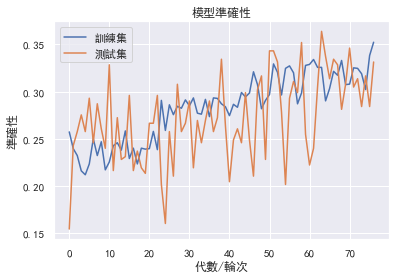

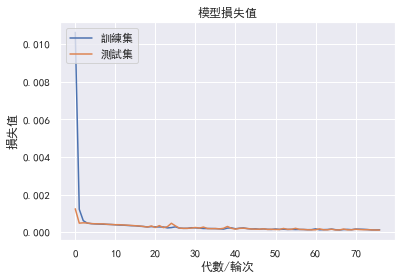

237/237 [==============================] - ETA:  - 0s 367us/step
[0.00013609933621448538, 0.007904347393834641, 0.4219409315394953]


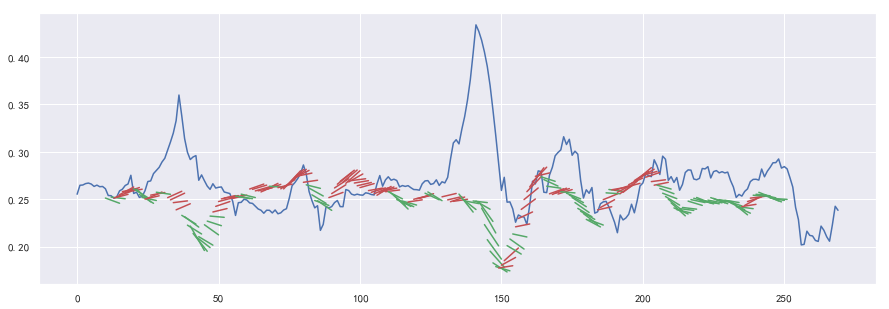

In [11]:
do('600146')

Train on 2374 samples, validate on 420 samples
Epoch 1/200
 - 5s - loss: 0.0086 - mean_absolute_error: 0.0679 - acc: 0.2115 - val_loss: 0.0012 - val_mean_absolute_error: 0.0267 - val_acc: 0.1690
Epoch 2/200
 - 3s - loss: 6.9350e-04 - mean_absolute_error: 0.0204 - acc: 0.1900 - val_loss: 5.2639e-04 - val_mean_absolute_error: 0.0160 - val_acc: 0.1595
Epoch 3/200
 - 3s - loss: 4.0452e-04 - mean_absolute_error: 0.0149 - acc: 0.2414 - val_loss: 5.0070e-04 - val_mean_absolute_error: 0.0156 - val_acc: 0.3286
Epoch 4/200
 - 3s - loss: 3.4553e-04 - mean_absolute_error: 0.0135 - acc: 0.2477 - val_loss: 4.8317e-04 - val_mean_absolute_error: 0.0150 - val_acc: 0.3167
Epoch 5/200
 - 3s - loss: 3.2144e-04 - mean_absolute_error: 0.0129 - acc: 0.2637 - val_loss: 4.6867e-04 - val_mean_absolute_error: 0.0146 - val_acc: 0.2786
Epoch 6/200
 - 3s - loss: 3.0498e-04 - mean_absolute_error: 0.0125 - acc: 0.2283 - val_loss: 4.4931e-04 - val_mean_absolute_error: 0.0142 - val_acc: 0.2738
Epoch 7/200
 - 3s - loss:

Epoch 53/200
 - 3s - loss: 1.0862e-04 - mean_absolute_error: 0.0077 - acc: 0.3311 - val_loss: 1.8920e-04 - val_mean_absolute_error: 0.0094 - val_acc: 0.2095
Epoch 54/200
 - 3s - loss: 1.2529e-04 - mean_absolute_error: 0.0085 - acc: 0.3024 - val_loss: 1.9090e-04 - val_mean_absolute_error: 0.0103 - val_acc: 0.3905
Epoch 55/200
 - 3s - loss: 1.2672e-04 - mean_absolute_error: 0.0086 - acc: 0.3239 - val_loss: 1.6797e-04 - val_mean_absolute_error: 0.0091 - val_acc: 0.3452
Epoch 56/200
 - 3s - loss: 1.2637e-04 - mean_absolute_error: 0.0085 - acc: 0.3075 - val_loss: 1.9882e-04 - val_mean_absolute_error: 0.0096 - val_acc: 0.3714
Epoch 57/200
 - 3s - loss: 1.0604e-04 - mean_absolute_error: 0.0076 - acc: 0.3277 - val_loss: 1.6446e-04 - val_mean_absolute_error: 0.0089 - val_acc: 0.3357
Epoch 58/200
 - 3s - loss: 1.1106e-04 - mean_absolute_error: 0.0079 - acc: 0.3227 - val_loss: 1.6745e-04 - val_mean_absolute_error: 0.0088 - val_acc: 0.2595
Epoch 59/200
 - 3s - loss: 1.1021e-04 - mean_absolute_erro

Epoch 106/200
 - 3s - loss: 9.8969e-05 - mean_absolute_error: 0.0075 - acc: 0.3564 - val_loss: 1.3670e-04 - val_mean_absolute_error: 0.0089 - val_acc: 0.3881
Epoch 107/200
 - 3s - loss: 9.2121e-05 - mean_absolute_error: 0.0073 - acc: 0.3555 - val_loss: 1.5240e-04 - val_mean_absolute_error: 0.0087 - val_acc: 0.3738
Epoch 108/200
 - 3s - loss: 9.0440e-05 - mean_absolute_error: 0.0071 - acc: 0.3496 - val_loss: 1.2061e-04 - val_mean_absolute_error: 0.0074 - val_acc: 0.2833
Epoch 109/200
 - 3s - loss: 8.0210e-05 - mean_absolute_error: 0.0066 - acc: 0.3425 - val_loss: 1.2147e-04 - val_mean_absolute_error: 0.0076 - val_acc: 0.3643
Epoch 110/200
 - 3s - loss: 1.0010e-04 - mean_absolute_error: 0.0076 - acc: 0.3429 - val_loss: 1.1432e-04 - val_mean_absolute_error: 0.0075 - val_acc: 0.3905
Epoch 111/200
 - 3s - loss: 1.0333e-04 - mean_absolute_error: 0.0078 - acc: 0.3446 - val_loss: 1.6400e-04 - val_mean_absolute_error: 0.0092 - val_acc: 0.3476
Epoch 112/200
 - 3s - loss: 9.4574e-05 - mean_absolu

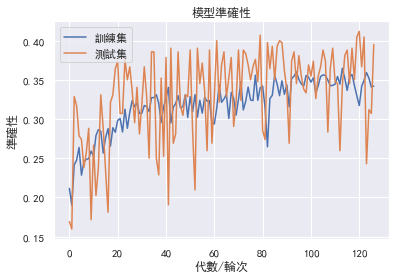

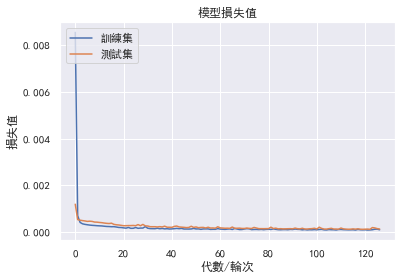

297/297 [==============================] - ETA:  - 0s 417us/step
[0.00010754246917719442, 0.006713247920703206, 0.3872053888108995]


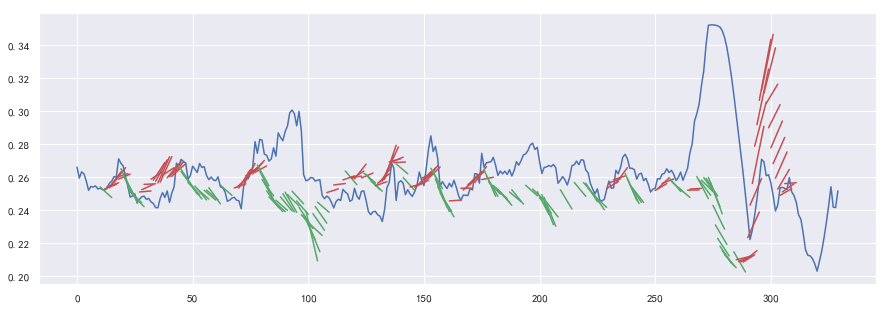

In [12]:
do('600399')

Train on 2310 samples, validate on 408 samples
Epoch 1/200
 - 5s - loss: 0.0102 - mean_absolute_error: 0.0748 - acc: 0.2273 - val_loss: 0.0011 - val_mean_absolute_error: 0.0261 - val_acc: 0.1569
Epoch 2/200
 - 3s - loss: 7.5986e-04 - mean_absolute_error: 0.0204 - acc: 0.2346 - val_loss: 2.3772e-04 - val_mean_absolute_error: 0.0110 - val_acc: 0.1593
Epoch 3/200
 - 3s - loss: 4.9268e-04 - mean_absolute_error: 0.0155 - acc: 0.2459 - val_loss: 2.2423e-04 - val_mean_absolute_error: 0.0107 - val_acc: 0.2598
Epoch 4/200
 - 3s - loss: 4.3131e-04 - mean_absolute_error: 0.0141 - acc: 0.2654 - val_loss: 1.9679e-04 - val_mean_absolute_error: 0.0099 - val_acc: 0.2647
Epoch 5/200
 - 3s - loss: 3.9797e-04 - mean_absolute_error: 0.0135 - acc: 0.2455 - val_loss: 1.8379e-04 - val_mean_absolute_error: 0.0095 - val_acc: 0.2623
Epoch 6/200
 - 3s - loss: 3.7532e-04 - mean_absolute_error: 0.0130 - acc: 0.2662 - val_loss: 1.7171e-04 - val_mean_absolute_error: 0.0092 - val_acc: 0.2230
Epoch 7/200
 - 3s - loss:

Epoch 53/200
 - 3s - loss: 1.3714e-04 - mean_absolute_error: 0.0081 - acc: 0.3485 - val_loss: 6.4119e-05 - val_mean_absolute_error: 0.0057 - val_acc: 0.1985
Epoch 54/200
 - 3s - loss: 1.3144e-04 - mean_absolute_error: 0.0079 - acc: 0.3325 - val_loss: 3.1859e-04 - val_mean_absolute_error: 0.0157 - val_acc: 0.2745
Epoch 55/200
 - 3s - loss: 1.9827e-04 - mean_absolute_error: 0.0103 - acc: 0.3225 - val_loss: 7.0393e-05 - val_mean_absolute_error: 0.0063 - val_acc: 0.1985
Epoch 56/200
 - 3s - loss: 1.3148e-04 - mean_absolute_error: 0.0078 - acc: 0.3489 - val_loss: 8.7471e-05 - val_mean_absolute_error: 0.0067 - val_acc: 0.2157
Epoch 57/200
 - 3s - loss: 1.5837e-04 - mean_absolute_error: 0.0089 - acc: 0.3290 - val_loss: 6.4744e-05 - val_mean_absolute_error: 0.0060 - val_acc: 0.3505
Epoch 58/200
 - 3s - loss: 1.3700e-04 - mean_absolute_error: 0.0081 - acc: 0.3602 - val_loss: 2.2899e-04 - val_mean_absolute_error: 0.0130 - val_acc: 0.3333
Epoch 59/200
 - 3s - loss: 1.7150e-04 - mean_absolute_erro

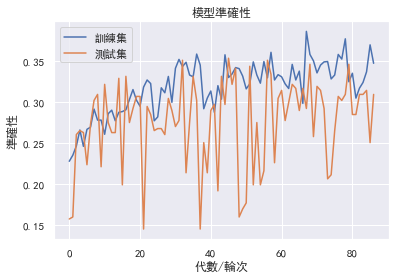

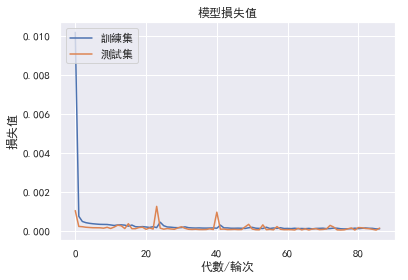

289/289 [==============================] - ETA:  - ETA:  - 0s 505us/step
[0.0001423987925534417, 0.009929271837032584, 0.4013840843855716]


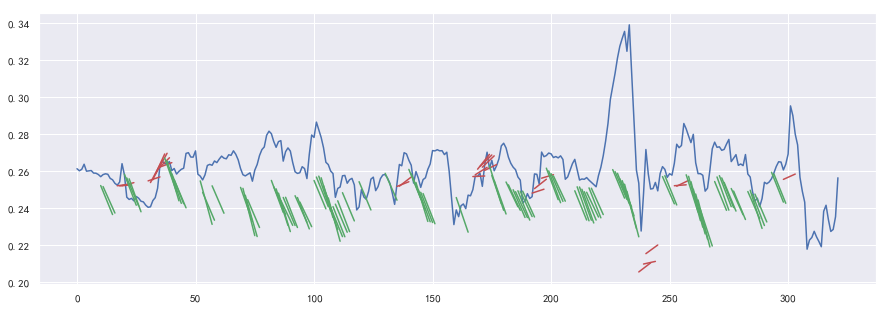

In [13]:
do('600844')

### 训练集

In [14]:
# 以下内容被封装在上面的方法Do中
# dataloader = DataLoader('601398', '399300')
# model = Model()
# comp = {"optimizer": "adam",
#         "loss": "mse",
#         "metrics": [
#             "mae",
#             "acc"
#         ]}
# norm = True
# days = 5
# window = 10
# # layers = [{'units': 100, 'type': 'lstm','return_sequences':True},
# #           {'rate': 0.15, 'type': 'dropout'},
# #           {'units': 200, 'type': 'lstm','return_sequences':False},
# #     {'units': days, 'type': 'dense', 'activation': 'linear'}]
# layers = [{'units': 500, 'type': 'lstm'},
#     {'units': days, 'type': 'dense'}]
# train = {'epochs': 200, 'verbose': 2, 'validation_split': 0.15}

# model.build_model(layers, comp)
# X, Y = dataloader.get_train_data(window, days, norm)
# history = model.train(X, Y, train)

In [15]:
# unit.plot_history(history)

### 验证集误差计算

In [16]:
# X_val, Y_val = dataloader.get_valid_data(window, days, True)
# # model.evaluate(X_val,Y_val)
# pred = model.predict(X_val)
# dd=DataLoader('601398', '399300',split=0,start=dataloader._df_valid.index[0].strftime('%Y-%m-%d'),online=True)
# dd_X=dd.get_train_data(window,days,True)[0][:,0,0]
# unit.plot_result_by_slope(dd_X, pred, window, days, top=100).show()

In [17]:
# X_val, Y_val = DataLoader('601398', '399300').get_valid_data(10, 5, True)
# model.evaluate(X_val,Y_val)

In [18]:
# (        scoremean      mean  scorestd       std  score
#  code                                                  
#  600436         10  0.919746        14  0.872932     24
#  000538         20  0.829186        53  0.974646     73
#  600967         84  0.665754         5  0.822424     89
#  600867         25  0.806169        68  0.995102     93
#  600612         63  0.698874        38  0.947990    101,
#          scoremean      mean  scorestd       std  score
#  code                                                  
#  000628       1231 -0.301008      1223  2.562733   2454
#  000155       1232 -0.336786      1226  2.661747   2458
#  600146       1228 -0.212451      1231  3.772514   2459
#  600399       1233 -0.438779      1228  3.066324   2461
#  600844       1234 -0.869499      1233  4.258635   2467)

In [19]:
# dataloader.data.iloc[-window-days:]

In [20]:
# def plot_results_multiple(predicted_data, true_data, prediction_len):
#     fig = plt.figure(facecolor='white',figsize=(18, 5))
#     ax = fig.add_subplot(111)
#     ax.plot(true_data, label='True Data')
# 	# Pad the list of predictions to shift it in the graph to it's correct start
#     for i, data in enumerate(predicted_data):
#         padding = [None for p in range(i)]
#         plt.plot(padding + list(data))
#         plt.legend()
#     plt.show()

In [21]:
# -(window+days)*2

In [22]:
# import datetime
# start_online=(dataloader.data.index[-1]+datetime.timedelta(days=-(window+days)*2)).strftime('%Y-%m-%d')
# print(start_online)
# online_data=DataLoader('601398', '399300',split=0,online=True,start=start_online)
# online_data.data.shape

In [23]:
# X_online,Y_online=online_data.get_train_data(window,days,norm)
# print(X_online.shape),print(Y_online.shape)
# Y_pred_online=model.predict(X_online,{ 'verbose': 2})

In [24]:
# unit.plot_by_xl(X_online,Y_online,window,days)
# unit.plot_by_xl(X_online,Y_pred_online,window,days)

In [25]:
# plot_results_multiple(Y_pred_online,Y_online[:,0],days)

In [26]:
# Y_pred_online

In [27]:
# Y_online[:,0]

In [28]:
# X_online[:,0][:,0]

In [29]:
# X_online[:,0,0]

In [30]:
# X_online